In [ ]:
!pip install geopandas
!pip install matplotlib
!pip install pandas


C:\Users\radif\AppData\Local\Temp\ipykernel_20528\1726609506.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


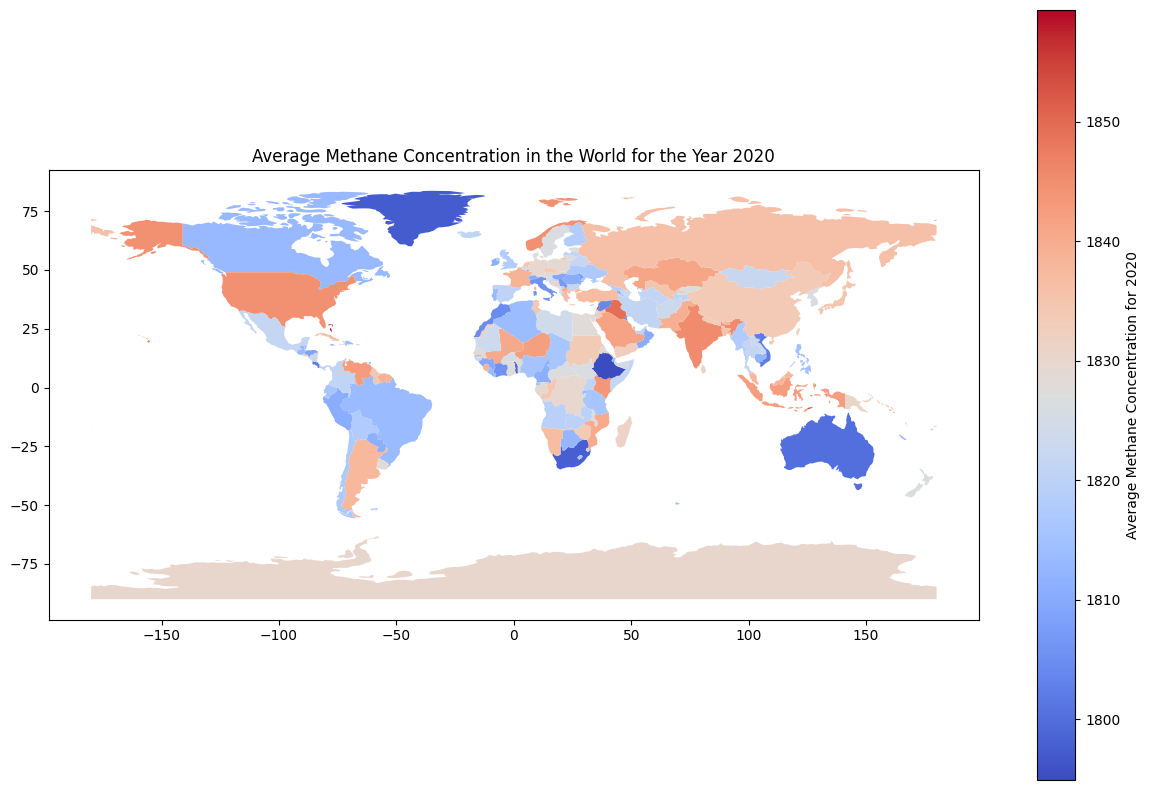

In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


dates = pd.date_range(start="2020-01-01", end="2020-12-31", freq='M')
methane_data = pd.DataFrame()

for country in world['name']:
    methane_values = np.random.randint(1750, 1900, size=len(dates))
    temp_df = pd.DataFrame({'Date': dates, 'Country': country, 'Methane_Concentration': methane_values})
    methane_data = pd.concat([methane_data, temp_df])


mean_methane_2020 = methane_data.groupby('Country')['Methane_Concentration'].mean().reset_index()


world = world.set_index('name')
mean_methane_2020 = mean_methane_2020.set_index('Country')
world['Methane'] = mean_methane_2020['Methane_Concentration']


fig, ax = plt.subplots(1, figsize=(15, 10))


world.plot(column='Methane', ax=ax, legend=True,
           legend_kwds={'label': "Average Methane Concentration for 2020"},
           cmap='coolwarm')

plt.title('Average Methane Concentration in the World for the Year 2020')
plt.show()
